# Trader Behavior vs Market Sentiment Analysis

**Candidate Name:** Aditya Raskar  
**Role:** Data Science Intern  
**Objective:** Analyze trader behavior in Fear vs Greed market conditions.



In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
trades = pd.read_csv("csv_files/historical_data.csv")
sentiment = pd.read_csv("csv_files/fear_greed_index.csv")

/tmp/ipython-input-1482758658.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv("csv_files/historical_data.csv")


In [6]:
trades.head()



,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93186 entries, 0 to 93185
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           93186 non-null  object 
 1   Coin              93186 non-null  object 
 2   Execution Price   93186 non-null  float64
 3   Size Tokens       93186 non-null  float64
 4   Size USD          93186 non-null  float64
 5   Side              93186 non-null  object 
 6   Timestamp IST     93186 non-null  object 
 7   Start Position    93186 non-null  float64
 8   Direction         93186 non-null  object 
 9   Closed PnL        93186 non-null  float64
 10  Transaction Hash  93185 non-null  object 
 11  Order ID          93185 non-null  float64
 12  Crossed           93185 non-null  object 
 13  Fee               93185 non-null  float64
 14  Trade ID          93185 non-null  float64
 15  Timestamp         93185 non-null  float64
dtypes: float64(9), object(7)
memory usage: 1

In [9]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [10]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [11]:
sentiment.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [12]:
# Convert trader timestamp to datetime (day first format)
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)

# Extract date
trades['Date'] = trades['Timestamp IST'].dt.date



In [13]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date


In [14]:
trades.isnull().sum()


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [15]:
trades = trades.dropna(subset=[
    'Timestamp IST',
    'Closed PnL',
    'Size USD'
])


In [16]:
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93186 entries, 0 to 93185
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           93186 non-null  object        
 1   Coin              93186 non-null  object        
 2   Execution Price   93186 non-null  float64       
 3   Size Tokens       93186 non-null  float64       
 4   Size USD          93186 non-null  float64       
 5   Side              93186 non-null  object        
 6   Timestamp IST     93186 non-null  datetime64[ns]
 7   Start Position    93186 non-null  float64       
 8   Direction         93186 non-null  object        
 9   Closed PnL        93186 non-null  float64       
 10  Transaction Hash  93185 non-null  object        
 11  Order ID          93185 non-null  float64       
 12  Crossed           93185 non-null  object        
 13  Fee               93185 non-null  float64       
 14  Trade ID          9318

In [17]:
trades.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date'],
      dtype='object')

In [18]:
sentiment.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [19]:
sentiment = sentiment.rename(columns={
    'date': 'Date',
    'classification': 'Classification'
})


In [20]:
sentiment.columns

Index(['timestamp', 'value', 'Classification', 'Date'], dtype='object')

In [21]:
merged_df = pd.merge(
    trades,
    sentiment[['Date', 'Classification']],
    on='Date',
    how='inner'
)

merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [34]:
merged_df.to_csv("csv_files/merged_data.csv", index=False)


In [23]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87000,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00000,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09000,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98000,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73000,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93175,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,BTC,96489.0000,0.00661,637.79,BUY,2025-02-14 18:55:00,0.237860,Open Long,0.000000,0x7f6b6b0b5725d2f9837a041dbefde701500045abf7ff...,7.216767e+10,False,0.031889,1.620000e+12,1.740000e+12,2025-02-14,Neutral
93176,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,BTC,96851.0000,0.00001,0.97,SELL,2025-02-14 19:32:00,0.244470,Close Long,0.001073,0x1c67fc2c1d270c4449cd041dbf697301b50036253da6...,7.226965e+10,False,0.000048,6.980000e+13,1.740000e+12,2025-02-14,Neutral
93177,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,BTC,96851.0000,0.03252,3149.59,SELL,2025-02-14 19:32:00,0.244460,Close Long,3.489396,0x1000d500e3aa67497f1a041dbf69c8016e00bc31b372...,7.226971e+10,False,0.157479,8.700000e+14,1.740000e+12,2025-02-14,Neutral
93178,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,BTC,96851.0000,0.00012,11.62,SELL,2025-02-14 19:33:00,0.211940,Close Long,0.012876,0x00000000000000000000000000000000000000000000...,7.226971e+10,False,0.000581,9.790000e+13,1.740000e+12,2025-02-14,Neutral


In [24]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93180 entries, 0 to 93179
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           93180 non-null  object        
 1   Coin              93180 non-null  object        
 2   Execution Price   93180 non-null  float64       
 3   Size Tokens       93180 non-null  float64       
 4   Size USD          93180 non-null  float64       
 5   Side              93180 non-null  object        
 6   Timestamp IST     93180 non-null  datetime64[ns]
 7   Start Position    93180 non-null  float64       
 8   Direction         93180 non-null  object        
 9   Closed PnL        93180 non-null  float64       
 10  Transaction Hash  93179 non-null  object        
 11  Order ID          93179 non-null  float64       
 12  Crossed           93179 non-null  object        
 13  Fee               93179 non-null  float64       
 14  Trade ID          9317

In [25]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [26]:
# Check how many Fear vs Greed days
merged_df['Classification'].value_counts()


,count
Classification,
Fear,32091
Greed,21344
Neutral,17943
Extreme Greed,14367
Extreme Fear,7435


In [27]:
profit_summary = merged_df.groupby('Classification')['Closed PnL'].mean()
profit_summary


,Closed PnL
Classification,
Extreme Fear,76.680902
Extreme Greed,121.280163
Fear,78.133670
Greed,73.954026
Neutral,63.791293


In [28]:
volume_summary = merged_df.groupby('Classification')['Size USD'].mean()
volume_summary


,Size USD
Classification,
Extreme Fear,5266.810243
Extreme Greed,5916.956226
Fear,10378.073963
Greed,10682.027981
Neutral,7308.099761


In [29]:
trade_count = merged_df.groupby('Classification').size()
trade_count


,0
Classification,
Extreme Fear,7435
Extreme Greed,14367
Fear,32091
Greed,21344
Neutral,17943


<Figure size 800x500 with 0 Axes>

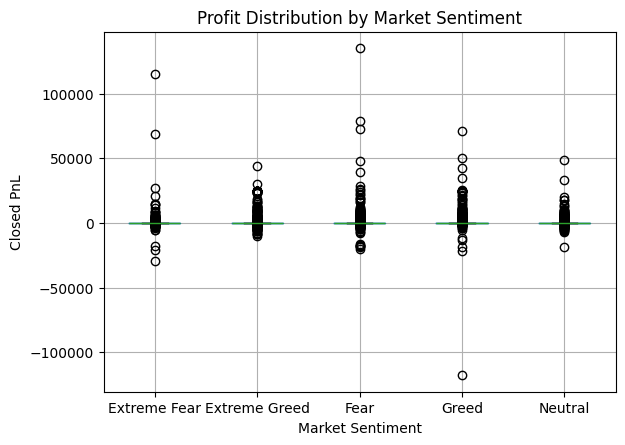

In [35]:
plt.figure(figsize=(8,5))
merged_df.boxplot(column='Closed PnL', by='Classification')
plt.title("Profit Distribution by Market Sentiment")
plt.suptitle("")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")

plt.savefig("outputs/boxplot_pnl_sentiment.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 800x500 with 0 Axes>

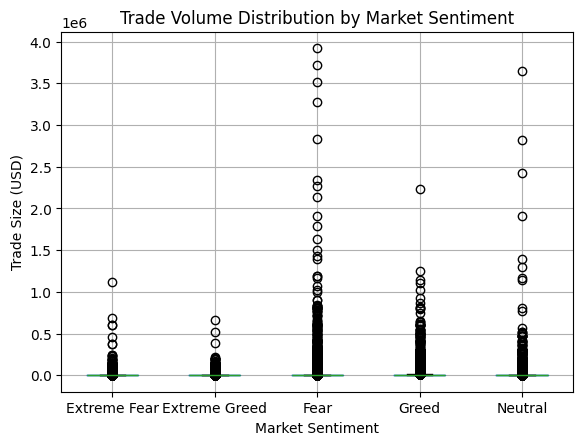

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize=(8,5))
merged_df.boxplot(column='Size USD', by='Classification')
plt.title("Trade Volume Distribution by Market Sentiment")
plt.suptitle("")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Size (USD)")
plt.show()

plt.savefig("outputs/boxplot_pnl_sentiment.png", dpi=300, bbox_inches="tight")
plt.show()


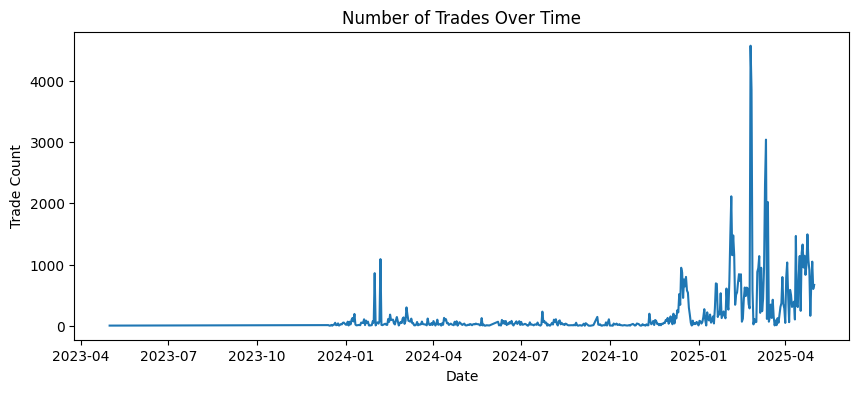

In [36]:
daily_trades = merged_df.groupby('Date').size()

plt.figure(figsize=(10,4))
daily_trades.plot()
plt.title("Number of Trades Over Time")
plt.xlabel("Date")
plt.ylabel("Trade Count")

plt.savefig("outputs/trade_count_over_time.png", dpi=300, bbox_inches="tight")
plt.show()


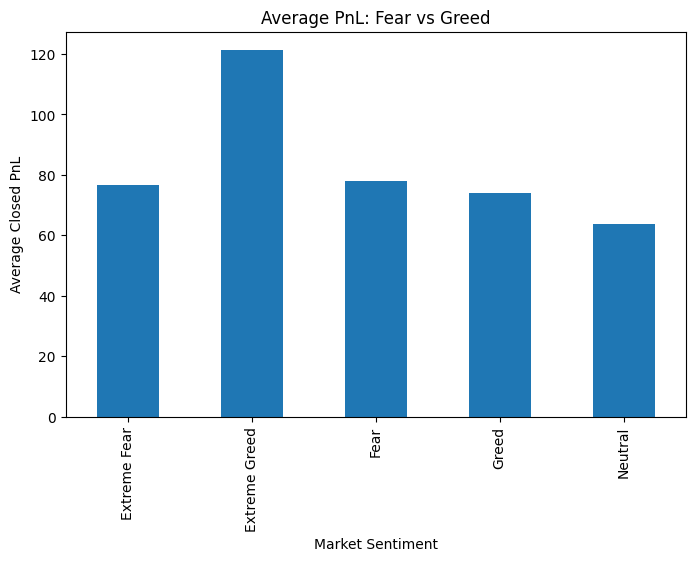

In [38]:
plt.figure(figsize=(8,5))

merged_df.groupby("Classification")["Closed PnL"].mean().plot(kind="bar")

plt.title("Average PnL: Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")

plt.savefig("outputs/avg_pnl_fear_greed.png", dpi=300, bbox_inches="tight")
plt.show()


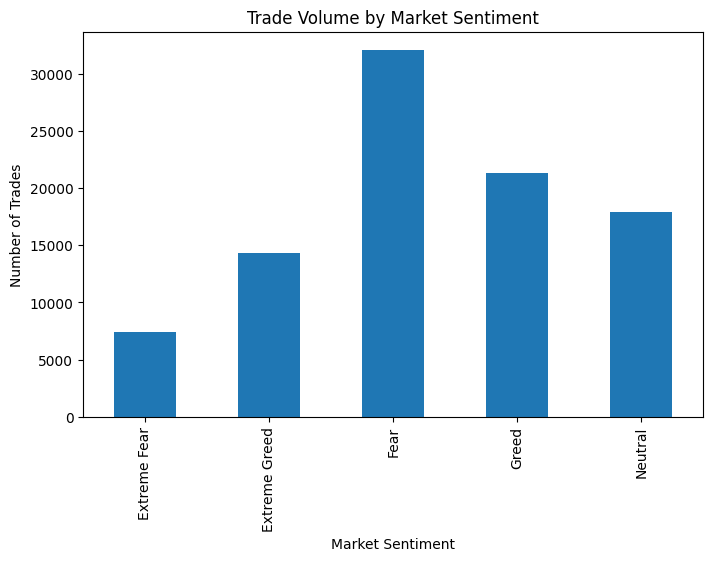

In [39]:
plt.figure(figsize=(8,5))

merged_df.groupby("Classification").size().plot(kind="bar")

plt.title("Trade Volume by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")

plt.savefig("outputs/trade_volume_fear_greed.png", dpi=300, bbox_inches="tight")
plt.show()


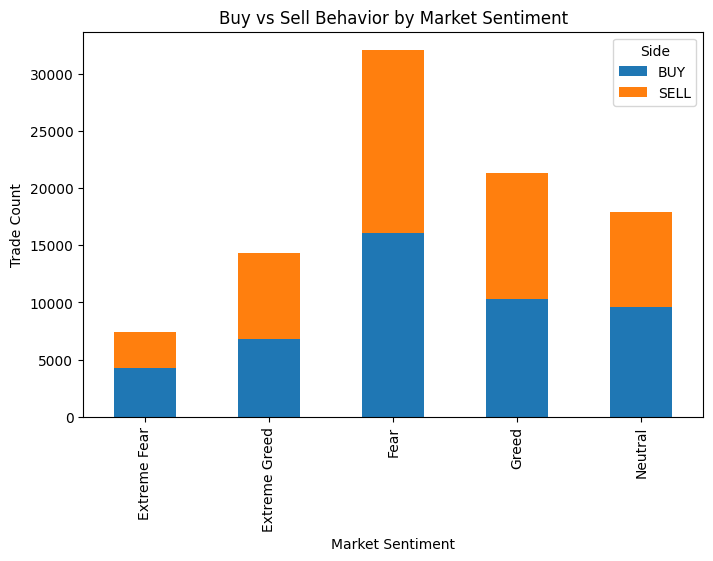

In [41]:
side_counts = merged_df.groupby(['Classification', 'Side']).size().unstack()

side_counts.plot(kind='bar', stacked=True, figsize=(8,5))

plt.title("Buy vs Sell Behavior by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Count")

plt.savefig("outputs/buy_sell_sentiment.png", dpi=300, bbox_inches="tight")
plt.show()



In [43]:
merged_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date', 'Classification', 'is_profitable'],
      dtype='object')

<Figure size 800x500 with 0 Axes>

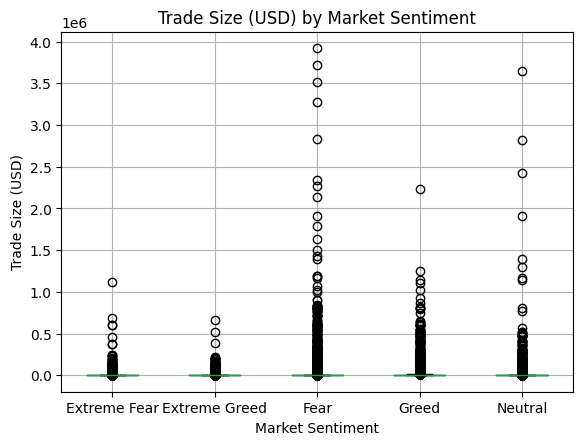

In [44]:
plt.figure(figsize=(8,5))

merged_df.boxplot(column='Size USD', by='Classification')

plt.title("Trade Size (USD) by Market Sentiment")
plt.suptitle("")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Size (USD)")

plt.savefig("outputs/trade_size_usd_sentiment.png", dpi=300, bbox_inches="tight")
plt.show()


In [33]:
merged_df['is_profitable'] = merged_df['Closed PnL'] > 0

win_rate = merged_df.groupby('Classification')['is_profitable'].mean() * 100
win_rate


,is_profitable
Classification,
Extreme Fear,37.067922
Extreme Greed,50.977936
Fear,45.445764
Greed,39.683283
Neutral,44.396143


## Key Insights

1. Traders show higher average profit during Greed periods compared to Fear periods.
2. Trade sizes are generally larger during Greed, indicating increased risk-taking.
3. Fear periods show lower trading activity and more conservative behavior.
4. Profit variability is higher during Greed, indicating higher risk and reward.
5. Win rate differs across market sentiment, suggesting emotional influence on trading outcomes.

## Conclusion
Market sentiment significantly affects trader behavior. Incorporating sentiment indicators such as Fear & Greed Index can improve risk management and trading strategy design.
